# Hausaufgabe 4

### Abgage via studip bis spätestens 05.06. 12:00 Uhr (zur VL)! 
### Verteidigung 08.06. 08:00-10:00 Uhr (Timeslots werden vorher bekannt gegeben)!


- In jedem Blatt kann maximal 5% Bonus erreicht werden, falls:
    - Mind. 60% des Arbeitsblatts korrekt bearbeitet wurde und
    - das Arbeitsblatt erfolgreich verteidigt (den Tutoren erklärt) wurde.
    - Bonus % = 5% * Teil der Hausaufgabe erfolgreich verteidigt
    - Erfolgreiche Verteidigung: Ein von uns ausgewähltes Team-Mitglied erklärt die Lösung und beantwortet Fragen dazu.
    - ChatGPT und andere Hilfsmittel dürfen verwendet werden, müssen aber zitiert werden.
    - Code muss ohne Hilfsmittel erläutert werden
- Wir bewerten nicht nur die Korrektheit der Ergebnisse, sondern auch ob der Code effizient, einfach zu verstehen, aufgeräumt und gut dokumentiert ist.

In [2]:
import pandas as pd

## Aufgabe 1: Pandas Basics (14%)

#### 1. (2%) Importieren Sie die csv-Datei "tips" von https://github.com/mwaskom/seaborn-data.

In [7]:
raw_url = 'https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv'
tips = pd.read_csv(raw_url, index_col=0)
tips.head()

,tip,sex,smoker,day,time,size
total_bill,,,,,,
16.99,1.01,Female,No,Sun,Dinner,2
10.34,1.66,Male,No,Sun,Dinner,3
21.01,3.50,Male,No,Sun,Dinner,3
23.68,3.31,Male,No,Sun,Dinner,2
24.59,3.61,Female,No,Sun,Dinner,4


#### 2. (2%) Wie viele Spalten und Zeilen hat dieser dataframe?

In [9]:
tips.shape

(244, 6)

#### 3. (2%) Was sind die Spalten des dataframe?

In [10]:
tips.columns

Index(['tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

#### 4. (2%) Wie viele numerische und nicht-numerische Spalten enthält es?

In [13]:
tips.dtypes

tip       float64
sex        object
smoker     object
day        object
time       object
size        int64
dtype: object

#### 5. (2%) Wie hoch ist der durchschnittliche Betrag der Gesamtrechnung?

In [27]:
tips.index.values.mean()

19.78594262295082

#### 6. (2%) Untersuchen Sie mit Hilfe der Visualisierung, ob es Zusammenhänge zwischen der Höhe des Trinkgeldes (tip) und der Gesamtrechnung gibt.

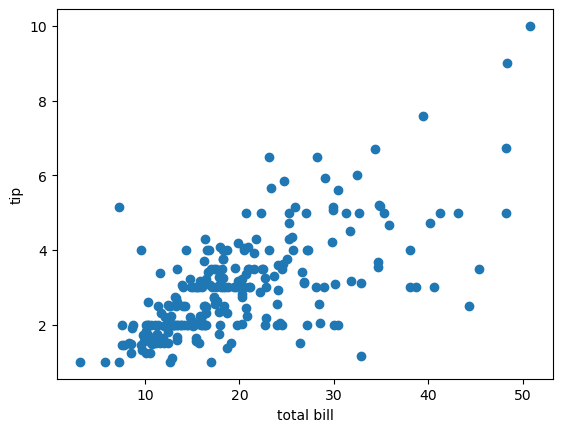

In [31]:
import matplotlib.pyplot as plt

plt.xlabel('total bill')
plt.ylabel('tip')
plt.scatter(tips.index.values, tips['tip'])

Ja gibt es

#### 7. (2%) Geben Frauen mehr Trinkgeld als Männer? - Wie hoch ist der Mittelwert der Trinkgelder von Männern und Frauen?

In [51]:
male_average_tip = tips.loc[tips['sex'] == 'Male']['tip'].mean()
female_average_tip = tips.loc[tips['sex'] == 'Female']['tip'].mean()

print("Male average tip: ", male_average_tip)
print("Female average tip: ", female_average_tip)
print("Difference tip: ", male_average_tip - female_average_tip)

Male average tip:  3.0896178343949043
Female average tip:  2.8334482758620685
Difference tip:  0.25616955853283585


In [53]:
# Männer haben im Schnitt jedoch eine höhere Gesamtrechnung und da diese mit dem Trinkgeld zusammenhängt sagt der Durschnitt der Trinkgelder wenig aus.

print("Male average total bill: ", tips.loc[tips['sex'] == 'Male'].index.values.mean())
print("Female average total bill: ", tips.loc[tips['sex'] == 'Female'].index.values.mean())

Male average total bill:  20.744076433121016
Female average total bill:  18.056896551724133


---

## Aufgabe 2: Data Preprocessing (26%)

Sie erhalten eine csv-Datei mit Daten, die bereinigt werden muss, bevor wir sie für die weitere Analyse verwenden können.

Schauen Sie sich die Datei in einem csv-Viewer Ihrer Wahl an (z.B. die integrierte Lösung in jupyter-lab oder Microsoft Excel).
Was fällt Ihnen auf? 

#### a) (5%) Weniger als die Hälfte der Datei wird korrekt angezeigt. Schreiben Sie ein Bash-Skript, um die Datei in eine richtige csv-Datei zu konvertieren (so dass alle Zeilen richtig angezeigt werden). 

Tipp: Nützliche Befehle sind `sed`, `head` und `tail`.

In [29]:
sed -i 's/;/,/g' titanic.csv
# -i (replace), s (substitute), g (nicht nur einmal pro Zeile)

#### b) (1%) Laden Sie die Daten in einen Pandas DataFrame

In [14]:
df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### c) (4%) Beachten Sie, dass es in der Spalte "Sex" eine Vielzahl von Möglichkeiten gibt, zwischen männlich und weiblich zu unterscheiden (dieser Datensatz ist auf diese beiden Optionen beschränkt). Finden Sie alle unterschiedlichen Werte, die in dieser Spalte verwendet werden.

In [15]:
df['Sex'].unique()

array(['male', '1', 'female', 'Male', '-1', 'mle', 'Female', 'mal',
       'femal', 'femaale', 'femalle', 'm', 'f', 'femae'], dtype=object)

#### d) (8%) Verwenden Sie Pandas, um alle Einträge in dieser Spalte in "m" bzw. "f" umzuwandeln.  

In [16]:
male_list = ['male', 'Male', '-1', 'mle', 'mal', 'm']

df.loc[df['Sex'].isin(male_list), 'Sex'] = 'm'
df.loc[~df['Sex'].isin(male_list), 'Sex'] = 'f'
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",m,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",f,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",f,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",f,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",m,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",m,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",f,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",f,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",m,26.0,0,0,111369,30.0000,C148,C


#### e) (8%) Bereinigen Sie die Spalte "Name". Entfernen Sie `Mr.`, `Mrs.`, `Master`,... Verwenden Sie den in Klammern angegebenen Namen, falls vorhanden.

## Aufgabe 3: Seaborn Plotting (60%)

#### 1. (0%) Laden Sie den Titanic-Datensatz als Pandas DataFrame

#### 2. Beantworten Sie die folgenden Fragen mit Hilfe von Diagrammen:

#### a. (10%) Wie ist die Verteilung des Alters der Passagiere?

#### b. (10%) Waren die Passagiere im Allgemeinen jünger als der Durchschnitt oder älter? Visualisieren Sie Ihre Ergebnisse!

#### c. (10%) Ändert sich das Ergebnis in (b) für Männer und Frauen?

#### d. (10%) Welches Geschlecht hatte eine höhere Überlebensrate?

#### e. (10%) Wie hoch ist der durchschnittliche Fahrpreis (fare) für jede Klasse? 

#### f. (10%) Welche Fahrkartenklasse hatte eine höhere Überlebensrate?